# Image Enhancement
#### Arithmetic Operations like addition, multiplication
#### Thresholding & Masking
#### Bitwise Operations like OR, AND, XOR

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

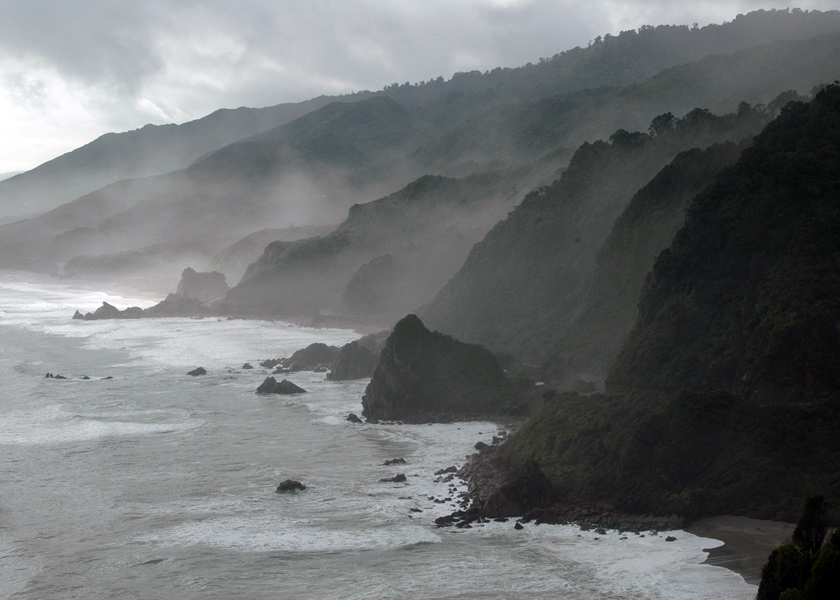

In [4]:
nz_coast_bgr=cv2.imread('New_Zealand_Coast.jpg',cv2.IMREAD_COLOR)
nz_coast_rgb=cv2.cvtColor(nz_coast_bgr,cv2.COLOR_BGR2RGB)

Image(filename='New_Zealand_Coast.jpg')


# Addition or Brightness
###### The first operation we discuss is simple addition of images. This results in increasing or decreasing the brightness of the image since we are eventually increasing or decreasing the intensity values of each pixel by the same amount. So, this will result in a global increase/decrease in brightness.

Text(0.5, 1.0, 'Bright')

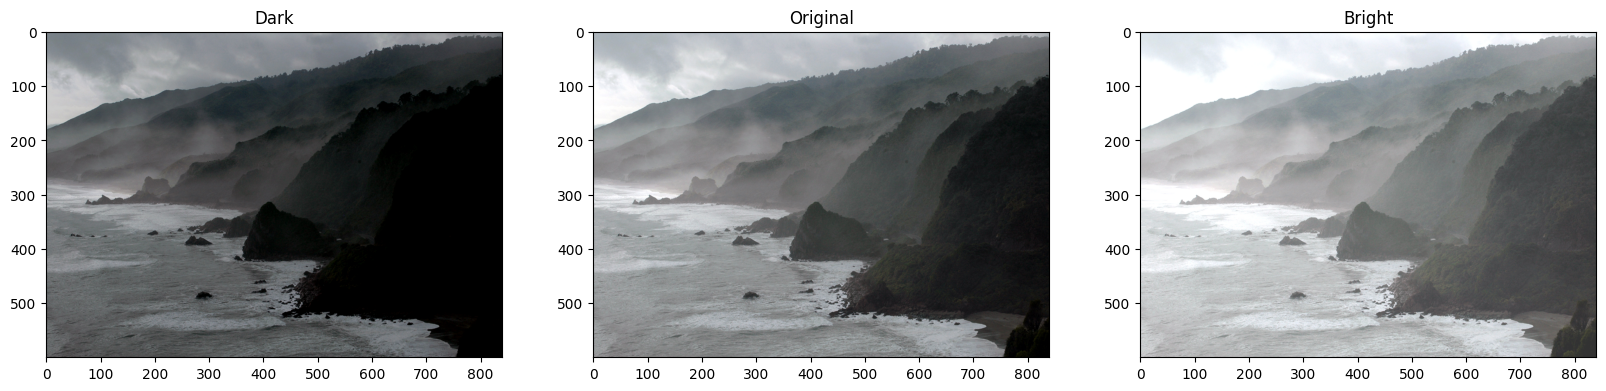

In [5]:
matrix = np.ones(nz_coast_rgb.shape,dtype='uint8')*50
nz_coast_rgb_bright = cv2.add(nz_coast_rgb,matrix)
nz_coast_rgb_dark = cv2.subtract(nz_coast_rgb,matrix)

plt.figure(figsize=[20,5])
plt.subplot(131);plt.imshow(nz_coast_rgb_dark);plt.title('Dark')
plt.subplot(132);plt.imshow(nz_coast_rgb);plt.title('Original')
plt.subplot(133);plt.imshow(nz_coast_rgb_bright);plt.title('Bright')

# Contrast or multiplication

##### Just like addition can result in brightness change, multiplication can be used to improve the contrast of the image.

##### Contrast is the difference in the intensity values of the pixels of an image. Multiplying the intensity values with a constant can make the difference larger or smaller ( if multiplying factor is < 1 ).

Text(0.5, 1.0, 'high contrast')

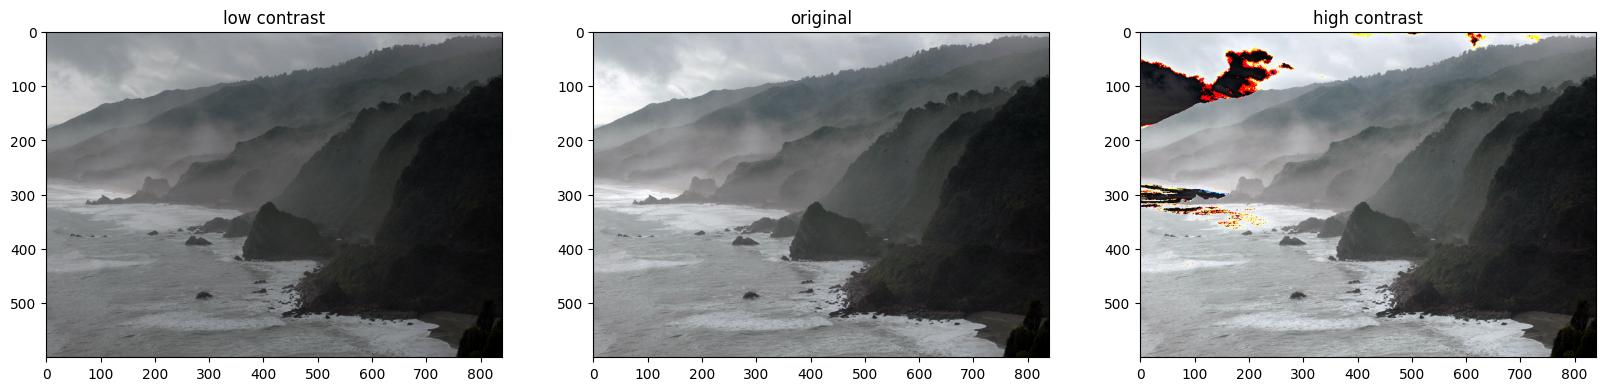

In [6]:
matrix1 = np.ones(nz_coast_rgb.shape)*0.8
matrix2 = np.ones(nz_coast_rgb.shape)*1.2

nz_coast_rgb_low_contrast = np.uint8(cv2.multiply(np.float64(nz_coast_rgb),matrix1))
nz_coast_rgb_high_contrast=np.uint8(cv2.multiply(np.float64(nz_coast_rgb),matrix2))

plt.figure(figsize=[20,5])
plt.subplot(131);plt.imshow(nz_coast_rgb_low_contrast);plt.title('low contrast')
plt.subplot(132);plt.imshow(nz_coast_rgb);plt.title('original')
plt.subplot(133);plt.imshow(nz_coast_rgb_high_contrast);plt.title('high contrast')

##### some unusual color occured in third figure is because of the overflow of values. It can be limited within 0 to 225 with the function np.clip()

Text(0.5, 1.0, 'high contrast')

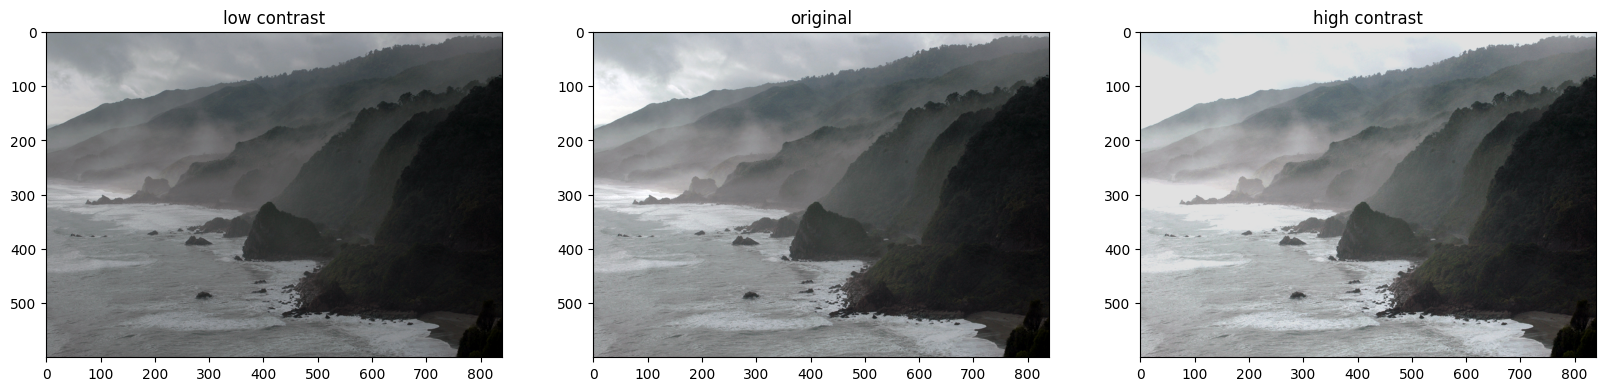

In [7]:
matrix1 = np.ones(nz_coast_rgb.shape)*0.8
matrix2 = np.ones(nz_coast_rgb.shape)*1.2

nz_coast_rgb_low_contrast = np.uint8(cv2.multiply(np.float64(nz_coast_rgb),matrix1))
nz_coast_rgb_high_contrast=np.uint8(np.clip(cv2.multiply(np.float64(nz_coast_rgb),matrix2),0,225))

plt.figure(figsize=[20,5])
plt.subplot(131);plt.imshow(nz_coast_rgb_low_contrast);plt.title('low contrast')
plt.subplot(132);plt.imshow(nz_coast_rgb);plt.title('original')
plt.subplot(133);plt.imshow(nz_coast_rgb_high_contrast);plt.title('high contrast')

# Image Thresholding

Text(0.5, 1.0, 'threshold')

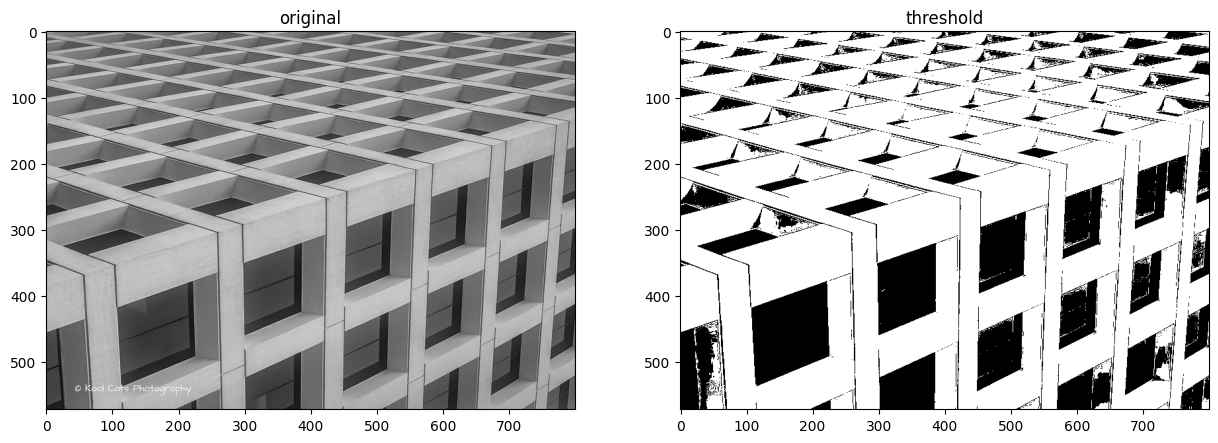

In [38]:
#Global thresholding
building_img = cv2.imread('building-windows.jpg',cv2.IMREAD_GRAYSCALE)
retval,output_img = cv2.threshold(building_img,100,255,cv2.THRESH_BINARY)

plt.figure(figsize=[15,5])

plt.subplot(121);plt.imshow(building_img,cmap='gray');plt.title('original')
plt.subplot(122);plt.imshow(output_img,cmap='gray');plt.title('threshold')



Text(0.5, 1.0, 'Adaptive')

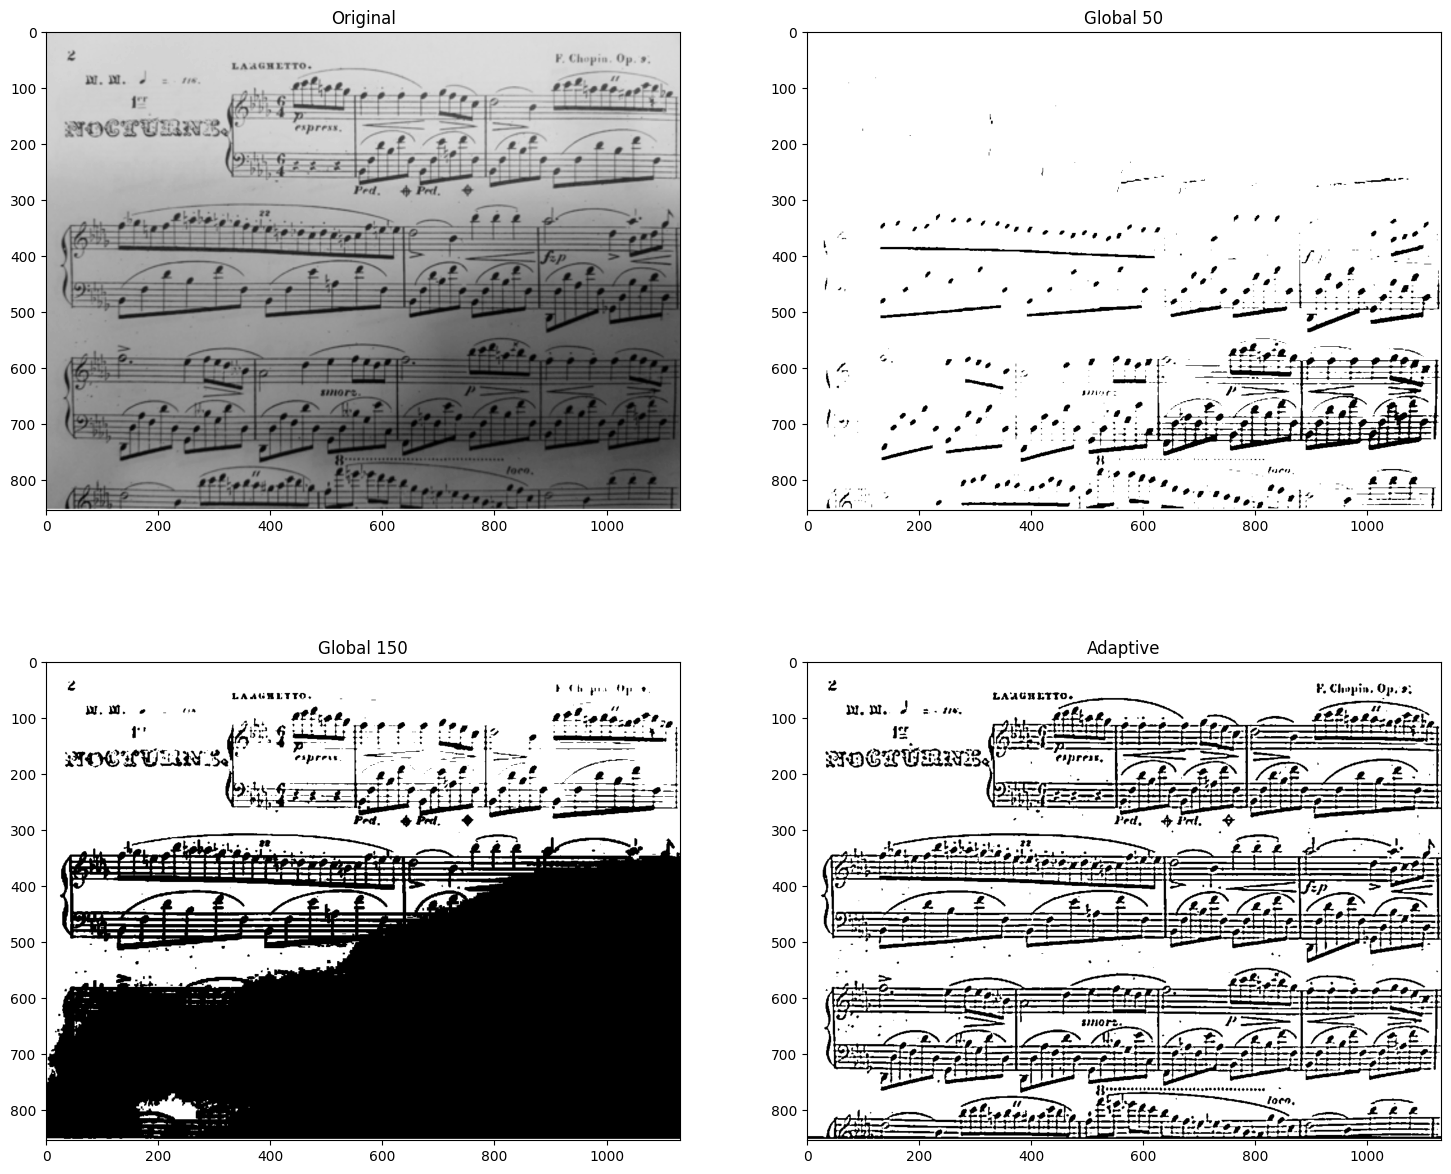

In [16]:
piano_img = cv2.imread('Piano_Sheet_Music.png',cv2.IMREAD_GRAYSCALE)
#global thresholding
retval,piano_img_gbl1 = cv2.threshold(piano_img,50,255,cv2.THRESH_BINARY)

retval,piano_img_gbl2 = cv2.threshold(piano_img,150,255,cv2.THRESH_BINARY)

#adaptive thresholding
piano_adaptive = cv2.adaptiveThreshold(piano_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,7)

plt.figure(figsize=[18,15])

plt.subplot(221);plt.imshow(piano_img,cmap='gray');plt.title('Original')
plt.subplot(222);plt.imshow(piano_img_gbl1,cmap='gray');plt.title('Global 50')
plt.subplot(223);plt.imshow(piano_img_gbl2,cmap='gray');plt.title('Global 150')
plt.subplot(224);plt.imshow(piano_adaptive,cmap='gray');plt.title('Adaptive')

# Bitwise Operations
## AND
## OR
## XOR

(200, 499)
(200, 499)


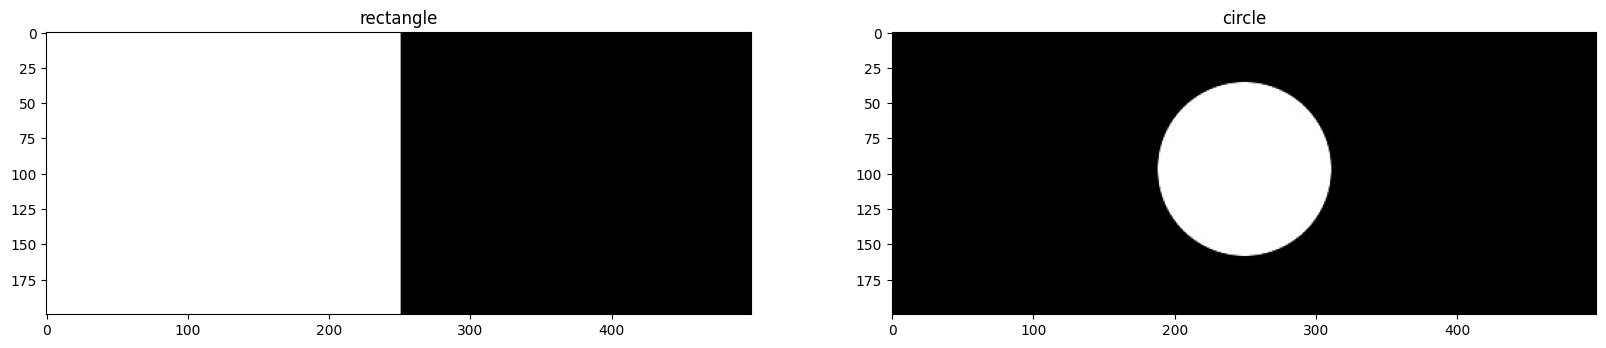

In [18]:
rectangle = cv2.imread('rectangle.jpg',0)
circle = cv2.imread('circle.jpg',0)

plt.figure(figsize=[20,5])
plt.subplot(121);plt.imshow(rectangle,cmap='gray');plt.title('rectangle')
plt.subplot(122);plt.imshow(circle,cmap='gray');plt.title('circle')
print(circle.shape)
print(rectangle.shape)

# performing 'AND' operation
## it will only show white where both images share white areas. the first half of the circle

Text(0.5, 1.0, 'AND')

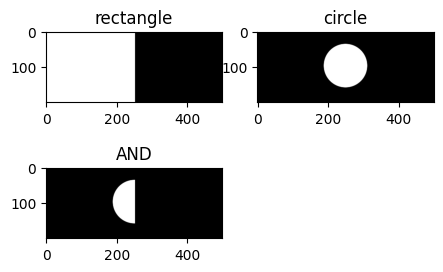

In [24]:
img_and = cv2.bitwise_and(rectangle,circle,mask=None)
plt.figure(figsize=[5,5])
plt.subplot(321);plt.imshow(rectangle,cmap='gray');plt.title('rectangle')
plt.subplot(322);plt.imshow(circle,cmap='gray');plt.title('circle')
plt.subplot(323);plt.imshow(img_and,cmap='gray');plt.title('AND')

#performing 'OR' operation
# it will only show black where both images share black areas.

Text(0.5, 1.0, 'OR')

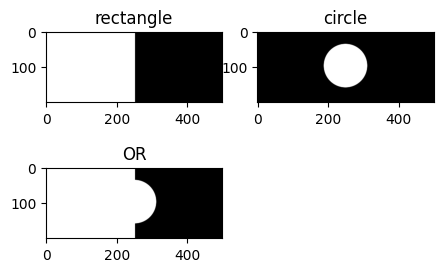

In [26]:
img_or = cv2.bitwise_or(rectangle,circle,mask=None)
plt.figure(figsize=[5,5])
plt.subplot(321);plt.imshow(rectangle,cmap='gray');plt.title('rectangle')
plt.subplot(322);plt.imshow(circle,cmap='gray');plt.title('circle')
plt.subplot(323);plt.imshow(img_or,cmap='gray');plt.title('OR')

# XOR

Text(0.5, 1.0, 'XOR')

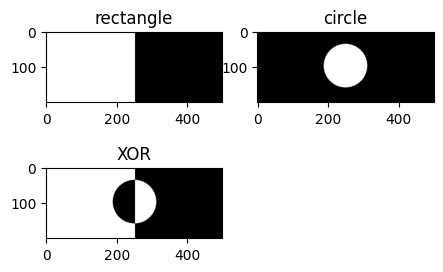

In [27]:
img_xor = cv2.bitwise_xor(rectangle,circle,mask=None)
plt.figure(figsize=[5,5])
plt.subplot(321);plt.imshow(rectangle,cmap='gray');plt.title('rectangle')
plt.subplot(322);plt.imshow(circle,cmap='gray');plt.title('circle')
plt.subplot(323);plt.imshow(img_xor,cmap='gray');plt.title('XOR')

# One application: Logo manipulation

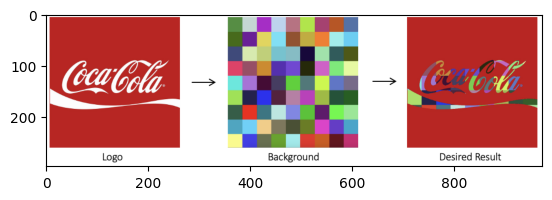

In [30]:
work_to_do_bgr = cv2.imread('Logo_Manipulation.png',1)
work_to_do_rgb = work_to_do_bgr[:,:,::-1]
plt.imshow(work_to_do_rgb)

# reading the foreground image

700
700


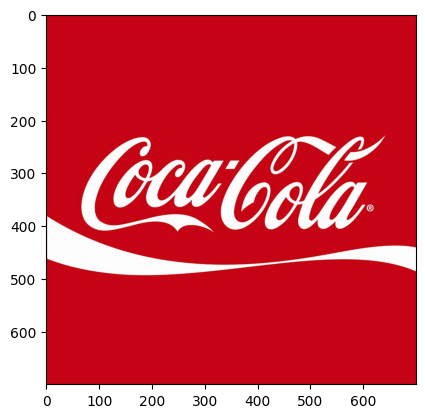

In [42]:
cola_img_bgr = cv2.imread('coca-cola-logo.png',1)
cola_img_rgb = cola_img_bgr[:,:,::-1]
plt.imshow(cola_img_rgb)
cola_img_height,cola_img_width = cola_img_rgb.shape[:2]
print(cola_img_height)
print(cola_img_width)


# Reading the background image

(1800, 1800, 3)


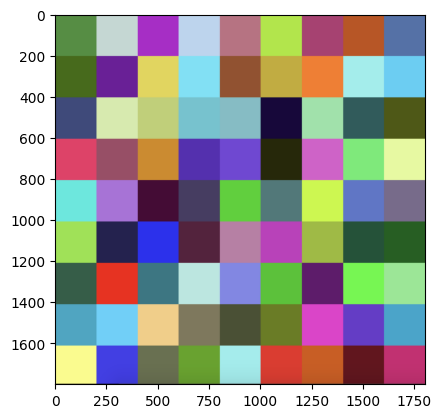

In [41]:
bg_img_bgr = cv2.imread('checkerboard_color.png',1)
bg_img_rgb = bg_img_bgr[:,:,::-1]
plt.imshow(bg_img_rgb)

print(bg_img_rgb.shape)

(700, 700, 3)


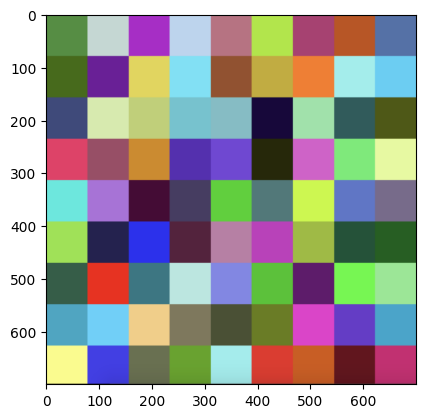

In [45]:
# Read in image of color cheackerboad background
img_background_bgr = cv2.imread("checkerboard_color.png")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

# Set desired width (logo_w) and maintain image aspect ratio
aspect_ratio = cola_img_width / img_background_rgb.shape[1]
dim = (cola_img_width, int(img_background_rgb.shape[0] * aspect_ratio))

# Resize background image to sae size as logo image
img_background_rgb = cv2.resize(img_background_rgb, dim, interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)


# Create mask for original image

(700, 700)


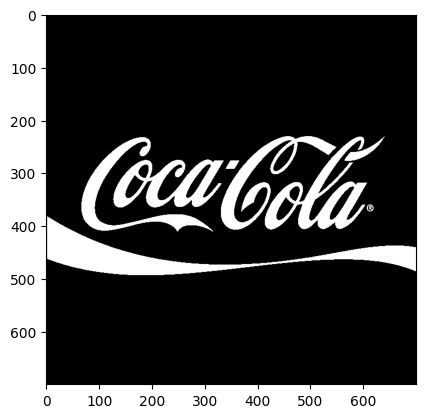

In [48]:
cola_img_gray = cv2.cvtColor(cola_img_rgb,cv2.COLOR_RGB2GRAY)
# apply global threshold to make mask
retval,cola_img_mask = cv2.threshold(cola_img_gray,127,255,cv2.THRESH_BINARY)
plt.imshow(cola_img_mask,cmap='gray')
print(cola_img_mask.shape)

# create a inverted mask

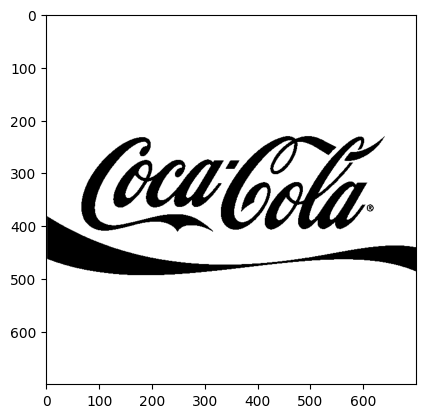

In [50]:
cola_img_mask_inv = cv2.bitwise_not(cola_img_mask,mask=None)
plt.imshow(cola_img_mask_inv,cmap='gray')

#now apply background on the mask
## for that do AND

In [53]:
bg_in_letters = cv2.bitwise_and(img_background_rgb,img_background_rgb,mask=cola_img_mask)
plt.imshow(bg_in_letters)

# Image on foreground

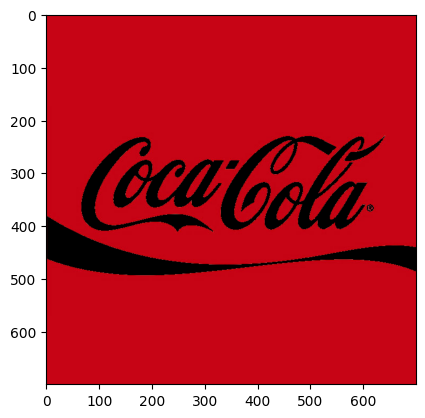

In [54]:
img_on_fg = cv2.bitwise_and(cola_img_rgb,cola_img_rgb,mask=cola_img_mask_inv)
plt.imshow(img_on_fg)

# final image

In [56]:
final_img = cv2.bitwise_or(bg_in_letters,img_on_fg,mask=None)
plt.imshow(final_img)